In [803]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [804]:
import tensorflow as tf
from tensorflow import keras

In [805]:
df=pd.read_csv('House_Price.csv')

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [806]:
print(df.columns)

Index(['price', 'resid_area', 'air_qual', 'room_num', 'age', 'dist1', 'dist2',
       'dist3', 'dist4', 'teachers', 'poor_prop', 'airport', 'n_hos_beds',
       'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter', 'parks', 'Sold'],
      dtype='object')


In [807]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


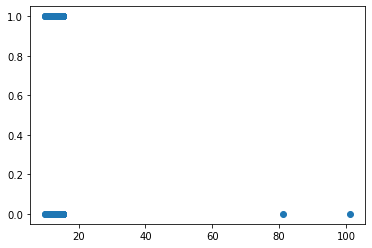

In [808]:
#NYARI PENCILAN
fig,ax=plt.subplots()
ax.scatter(df.n_hot_rooms,df.Sold)
plt.show()

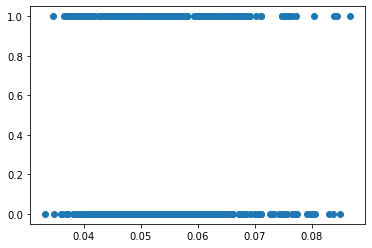

In [809]:
fig,ax=plt.subplots()
ax.scatter(df.parks,df.Sold)
plt.show()

In [810]:
pr=np.percentile(df.n_hot_rooms,[99])[0]
pr2=np.percentile(df.rainfall,[1])[0]

In [811]:
df.n_hot_rooms[df.n_hot_rooms>3*pr]=3*pr #nilai max ketinggian

C:\Users\ASUS1\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [812]:
df.rainfall[df.rainfall<0.3*pr2]=0.3*pr2 #nilai min kerendahan

C:\Users\ASUS1\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [813]:
pr,pr2

(15.399519999999999, 20.0)

In [814]:
df[df.n_hot_rooms>=3*pr]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0
423,13.4,48.10,0.614,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344,0


In [815]:
df[df.rainfall<=0.3*pr2]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019,1


In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [817]:
df.n_hos_beds=df.n_hos_beds.fillna(df.n_hos_beds.mean()) #ngisi value kosong

In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [819]:
df['avg_dist']=(df.dist1+df.dist2+df.dist3+df.dist4)/4
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,0,6.0625


In [820]:
df=pd.get_dummies(df) #to assign number to string varuable
df.head(2)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,0,4.0875,0,1,0,0,0,1,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,1,4.9675,1,0,1,0,0,0,1


In [821]:
del df['airport_NO']
del df['waterbody_None']

In [822]:
df.corr()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
price,1.000000,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,-0.154698,0.249289,0.182867,0.036233,-0.037497,0.071751,NaN
resid_area,-0.484754,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,0.024404,-0.708022,-0.115401,-0.026590,0.051649,-0.098976,NaN
air_qual,-0.429300,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.004017,-0.769247,-0.073903,-0.046393,0.013849,-0.037772,NaN
room_num,0.696304,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.027148,0.205241,0.163774,-0.004195,0.010554,0.046251,NaN
age,-0.377999,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.016291,-0.747906,0.005101,0.003452,-0.004354,-0.088609,NaN
teachers,0.505655,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.042525,0.232452,0.069437,0.048717,-0.046981,0.094256,NaN
poor_prop,-0.740836,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.082776,-0.496967,-0.095054,0.003197,0.020620,-0.109004,NaN
n_hos_beds,0.108880,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,0.066847,-0.027871,-0.006365,0.042278,0.059482,-0.074148,NaN
n_hot_rooms,0.017007,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.090338,-0.020700,-0.055338,0.037925,0.014755,-0.064096,NaN
rainfall,-0.047200,0.055845,0.091956,-0.064718,0.074684,-0.045928,0.061444,0.058596,0.014869,1.000000,0.078278,-0.040114,-0.037285,-0.013171,-0.016170,0.109234,-0.037016,NaN


In [823]:
del df['parks'] #mirip sama air qual
del df['air_qual']
df

,price,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,32.31,6.575,65.2,24.7,4.98,5.480,11.19200,23,0,4.0875,1,0,0,1,1
1,21.6,37.07,6.421,78.9,22.2,9.14,7.332,12.17280,42,1,4.9675,0,1,0,0,1
2,34.7,37.07,7.185,61.1,22.2,4.03,7.394,46.19856,38,0,4.9675,0,0,0,0,1
3,33.4,32.18,6.998,45.8,21.3,2.94,9.268,11.26720,45,0,6.0650,1,1,0,0,1
4,36.2,32.18,7.147,54.2,21.3,5.33,8.824,11.28960,55,0,6.0625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,6.593,69.1,19.0,9.67,9.348,12.17920,27,1,2.4775,0,0,1,0,1
502,20.6,41.93,6.120,76.7,19.0,9.08,6.612,13.16480,20,1,2.2875,1,0,1,0,1
503,23.9,41.93,6.976,91.0,19.0,5.64,5.478,12.19120,31,1,2.1675,0,0,0,0,1
504,22.0,41.93,6.794,89.3,19.0,6.48,7.940,15.17600,47,1,2.3900,1,0,0,0,1


In [824]:
df.columns
data=df[['price', 'resid_area', 'room_num', 'age', 'teachers', 'poor_prop',
       'n_hos_beds', 'n_hot_rooms', 'rainfall', 'avg_dist',
       'airport_YES', 'waterbody_Lake', 'waterbody_Lake and River',
       'waterbody_River', 'bus_ter_YES']]
target=df[['Sold']]

In [825]:
data.shape

(506, 15)

In [826]:
#X_valid, X_train = data[:253], data[253:]
#y_valid, y_train = target[:253], target[253:]

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(data, target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [827]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [828]:
np.random.seed(42)
tf.random.set_seed(42)

In [829]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

#model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
#model.add(keras.layers.Dense(300, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"))

In [830]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 300)          4800        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 300)          90300       dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 315)          0           input_1[0][0]                    
                                                                 dense_1[0][0]                

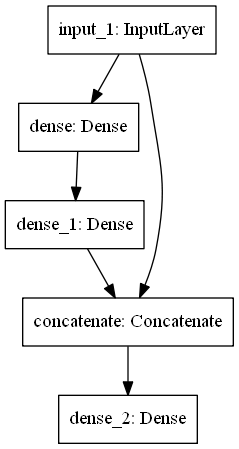

In [831]:
import pydot
keras.utils.plot_model(model)

In [832]:
weights, biases = model.layers[1].get_weights()

In [833]:
weights

array([[ 0.04542346, -0.01628368, -0.04060829, ..., -0.05131198,
         0.07158837, -0.12780276],
       [ 0.00883947, -0.05760682, -0.10883226, ...,  0.01118539,
        -0.05126987, -0.07727025],
       [-0.11481529, -0.12803586,  0.13175319, ..., -0.07862153,
         0.13210885, -0.1360071 ],
       ...,
       [-0.04451673,  0.08698483, -0.11039238, ...,  0.03328948,
        -0.08076344, -0.04119998],
       [ 0.10174274,  0.05389705, -0.01844323, ...,  0.01144984,
         0.02489084, -0.10387857],
       [-0.02934705,  0.06818275,  0.03815411, ..., -0.12172917,
        -0.10629527,  0.01542841]], dtype=float32)

In [834]:
weights.shape

(15, 300)

In [835]:
biases.shape

(300,)

In [836]:
model.compile(loss="binary_crossentropy", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

In [837]:
model_history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_valid, y_valid))

Train on 284 samples, validate on 95 samples
Epoch 1/500
284/284 [==============================] - 1s 3ms/sample - loss: 5.6493 - accuracy: 0.5176 - val_loss: 4.4186 - val_accuracy: 0.5474
Epoch 2/500
284/284 [==============================] - 0s 230us/sample - loss: 4.0856 - accuracy: 0.4965 - val_loss: 2.9369 - val_accuracy: 0.5158
Epoch 3/500
284/284 [==============================] - 0s 218us/sample - loss: 3.1722 - accuracy: 0.5176 - val_loss: 2.8516 - val_accuracy: 0.5368
Epoch 4/500
284/284 [==============================] - 0s 394us/sample - loss: 2.4225 - accuracy: 0.5141 - val_loss: 2.0831 - val_accuracy: 0.4316
Epoch 5/500
284/284 [==============================] - 0s 179us/sample - loss: 1.6955 - accuracy: 0.4930 - val_loss: 1.5636 - val_accuracy: 0.4526
Epoch 6/500
284/284 [==============================] - 0s 176us/sample - loss: 1.5871 - accuracy: 0.4930 - val_loss: 2.8216 - val_accuracy: 0.4211
Epoch 7/500
284/284 [==============================] - 0s 169us/sample - lo

In [838]:
mae_test = model.evaluate(X_test, y_test)

127/127 [==============================] - 0s 134us/sample - loss: 1.3339 - accuracy: 0.6850


In [839]:
model_history.history

{'loss': [5.649278942967804,
  4.085554613193995,
  3.172165937826667,
  2.4224908318318112,
  1.695545947048026,
  1.5870978211013365,
  1.859735155609292,
  0.9816555515141554,
  0.7911195620684557,
  0.765602749837956,
  0.7510415735379071,
  0.701247643417036,
  0.6786629037118294,
  0.6717465469534968,
  0.6645582410651194,
  0.6584482151018062,
  0.6522741737500043,
  0.646994626857865,
  0.6413674430108406,
  0.6360465422482557,
  0.6310532437243932,
  0.626581224757181,
  0.621813908429213,
  0.617646852849235,
  0.6133384587059558,
  0.6092758766362365,
  0.6050368228428801,
  0.6015280552313361,
  0.597639391120051,
  0.5937186320063094,
  0.5909673563191589,
  0.5871204121012084,
  0.5835631531728825,
  0.5800203563461841,
  0.5772820031139213,
  0.573939495523211,
  0.5706619620323181,
  0.5673725374147925,
  0.5647230929052326,
  0.5617473973354823,
  0.5591755614314281,
  0.5562666427921241,
  0.5536997645673617,
  0.5508069068613187,
  0.5480399316465351,
  0.54681387837

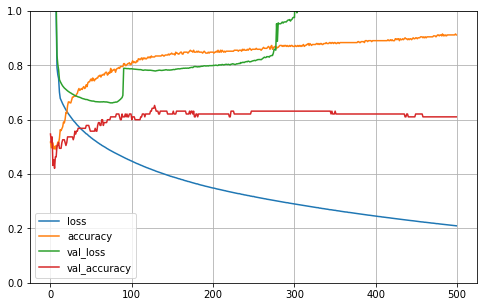

In [840]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [841]:
del model
keras.backend.clear_session()